# MQB7046 MODELLING PUBLIC HEALTH DATA - Logistic Regression



Logistic regression models are statistical models used to study effects of independent variables (IVs) on binary categorical outcomes, such as presence or absence of disease (e.g., diabetes or no diabetes).  The model is also called a binary logistic model. 
When there are multiple IVs (e.g., risk factors and treatments) the model is referred to as a multiple or multivariable logistic regression model. 

In the Statsmodels library, logistic regression can be performed using the following approach:
1) statsmodels.formula.api
2) statsmodels.api
3) statsmodels.discrete.discrete_model
4) statsmodels.genmod.generalized_linear_modelicients.



##### The General Steps Required to Run Multiple Logistic Regression:

1. **Prepare Your Data**:
   - Clean and preprocess the data, handle any missing values, outliers, and formatting issues.

2. **Fit the Logistic Regression Model**:
   - Use the `logit()` function from `statsmodels.formula.api` (or any above) to specify and fit the logistic regression model to the data. Specify the model using a formula string that includes the dependent variable and independent variables.

3. **Evaluate Performance**:
   - **Likelihood Ratio Test**: Perform a likelihood ratio test to compare the fit of the fitted model to a reduced model (null model). This test assesses whether the full model significantly improves the fit over the null model.
   - **Wald Test**: Perform a Wald test for each coefficient in the model to test the significance of individual predictors. This test assesses whether each coefficient significantly differs from zero.
   - **AIC and BIC**: Calculate the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) to compare the goodness-of-fit of the model to other models. Lower values indicate better fit.

4. **Assess Model Assumptions**:
   - Check the assumptions of logistic regression, such as linearity of the log odds, absence of multicollinearity, and absence of influential outliers.

5. **Interpret the Results**:
   - Interpret the coefficients of the logistic regression model to understand the relationship between the independent variables and the probability of the outcome. Report the estimated coefficients, odds ratios, confidence intervals, and statistical significance of the variables involved.


#### Practical 3

A medical student wanted to study the association between body mass index (BMI) and hypercholesterolemia (HCL). He selected 40 patients, all of similar age, and obtained their BMI values and hypercholesterolemia status from their medical records. Based on the BMI values, the patients were classified as overweight or normal. The data are provided as hcl.csv. 
- sex: 0: male, 1: female
- hcl: 0: no HCL, 1: HCL
- overweight: 0: Normal, 1: overweight

Run a multiple logistic regression to estimate the adjusted odds ratios to quantify the effect of sex and BMI on hypocholesterolemia. 


In [1]:
# Install statsmodels

# pip install statsmodels

In [2]:
# Import Pandas and the statsmodels Formula API

import pandas as pd
import statsmodels.formula.api as smf

In [3]:
# Load data into a DataFrame 

hcl = pd.read_csv("C:\\Users\\USER\\MPHD notebooks\\hcl.csv")

# or hcl = pd.read_csv(r"C:\Users\USER\MPHD notebooks\hcl.csv")

In [4]:
print(hcl)

    sex  overweight  hcl
0     1           1    1
1     0           0    0
2     0           0    0
3     1           1    1
4     0           1    1
5     1           1    1
6     0           1    1
7     1           0    1
8     1           1    0
9     0           0    0
10    0           0    1
11    0           1    0
12    1           1    1
13    0           0    1
14    0           0    0
15    1           1    1
16    1           0    0
17    1           1    0
18    1           1    0
19    0           1    1
20    1           0    0
21    1           0    0
22    0           1    1
23    0           0    0
24    1           0    0
25    1           1    1
26    1           0    0
27    1           0    0
28    0           0    0
29    0           1    0
30    0           1    0
31    0           1    1
32    1           1    0
33    0           0    0
34    0           1    1
35    1           0    1
36    0           1    1
37    1           1    1
38    1           1    1


In [5]:
# Display basic information about the dataset

print(hcl.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sex         40 non-null     int64
 1   overweight  40 non-null     int64
 2   hcl         40 non-null     int64
dtypes: int64(3)
memory usage: 1.1 KB
None


In [6]:
# Display descriptive statistics
print(hcl.describe())

            sex  overweight       hcl
count  40.00000   40.000000  40.00000
mean    0.50000    0.575000   0.50000
std     0.50637    0.500641   0.50637
min     0.00000    0.000000   0.00000
25%     0.00000    0.000000   0.00000
50%     0.50000    1.000000   0.50000
75%     1.00000    1.000000   1.00000
max     1.00000    1.000000   1.00000


In [7]:
# Calculate frequencies
frequencies = hcl['sex'].value_counts()

# Calculate percentages
percentages = (frequencies / len(hcl)) * 100

# Combine frequencies and percentages into a DataFrame
frequency_table = pd.DataFrame({'Frequency': frequencies, 'Percentage': percentages})

# Sort the table by category or frequency if needed
frequency_table = frequency_table.sort_index()

print("Frequency Table:")
print(frequency_table)

Frequency Table:
     Frequency  Percentage
sex                       
0           20        50.0
1           20        50.0


In [8]:
import pandas as pd


def generate_frequency_percentage_table(data, variables):
    # Initialize an empty dictionary to store frequency and percentage tables for each variable
    tables = {}
    
    # Iterate over each variable
    for var in variables:
        # Calculate frequencies and percentages
        freq = data[var].value_counts()
        percent = (freq / len(data)) * 100
        
        # Create DataFrame for the variable
        table = pd.DataFrame({'Frequency': freq, 'Percentage': percent})
        
        # Store the table in the dictionary
        tables[var] = table
    
    return tables

# List of variables to generate frequency and percentage tables for
variables_to_generate = ['sex', 'overweight', 'hcl']

# Generate frequency and percentage tables for the variables
frequency_percentage_tables = generate_frequency_percentage_table(hcl, variables_to_generate)

# Print the tables
for var, table in frequency_percentage_tables.items():
    print(f"\nFrequency and Percentage Table for '{var}':")
    print(table)



Frequency and Percentage Table for 'sex':
     Frequency  Percentage
sex                       
1           20        50.0
0           20        50.0

Frequency and Percentage Table for 'overweight':
            Frequency  Percentage
overweight                       
1                  23        57.5
0                  17        42.5

Frequency and Percentage Table for 'hcl':
     Frequency  Percentage
hcl                       
1           20        50.0
0           20        50.0


In [9]:
# Check for missing values
print(hcl.isnull().sum())

sex           0
overweight    0
hcl           0
dtype: int64


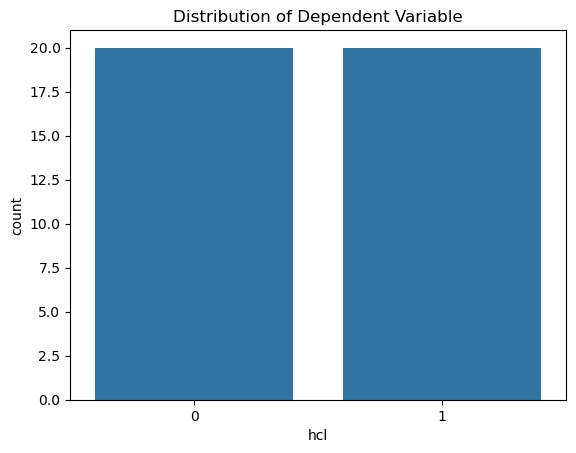

In [10]:
# Explore data distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the dependent variable (assuming 'dependent_var' is your target variable)
sns.countplot(x='hcl', data=hcl)
plt.title('Distribution of Dependent Variable')
plt.show()


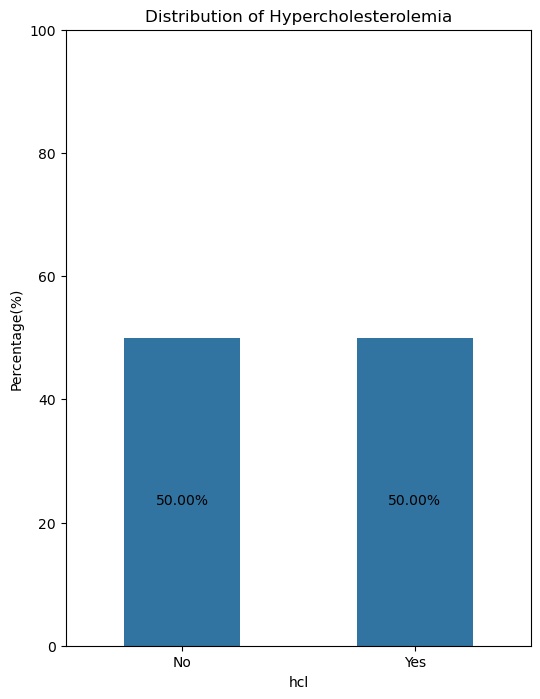

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percentages (of each category in the dependent variable)
total = float(len(hcl))
counts = hcl['hcl'].value_counts()
percentages = (counts / total) * 100

# Set figure size 
plt.figure(figsize=(6, 8))

# Visualize the distribution of the dependent variable with distinct colors for each bar
ax = sns.countplot(x='hcl', data=hcl, width=0.5)

# Set y-axis label to percentages
ax.set_ylabel('Percentage(%)')

# Set y-axis scale to percentages
ax.set_ylim(0, 100)

# Set x-axis ticks and labels
ax.set_xticks(range(len(counts)))
ax.set_xticklabels(['No', 'Yes'])

# Add percentage labels and adjust bar heights
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format(percentages[i]),
            ha="center")
    ax.patches[i].set_height(counts[i] / total * 100)

plt.title('Distribution of Hypercholesterolemia')
plt.show()


In [12]:
# import seaborn as sns

# Define color palette
# colors = sns.color_palette("pastel")

# Print the list of colors in the pastel palette
# print(colors)


In [13]:
# Conduct bivariate analysis

from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(hcl['sex'], hcl['hcl'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Format chi-square statistic and p-value to 3 decimal places
chi2_formatted = "{:.3f}".format(chi2)
p_formatted = "{:.3f}".format(p)

# Print the results
print("Chi-Square Statistic:", chi2_formatted)
print("p-value:", p_formatted)



Chi-Square Statistic: 0.000
p-value: 1.000


In [14]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(hcl['hcl'], hcl['hcl'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Format chi-square statistic and p-value to 3 decimal places
chi2_formatted = "{:.3f}".format(chi2)
p_formatted = "{:.3f}".format(p)

# Print the results
print("Chi-Square Statistic:", chi2_formatted)
print("p-value:", p_formatted)


Chi-Square Statistic: 36.100
p-value: 0.000


In [15]:
# Fitting a logistic regression

# smf.logit is used to create a logistic regression model using a formula interface (hcl given (~) sex and overweight)

log_reg = smf.logit("hcl ~ sex + overweight", data=hcl).fit()

# Examining fit results

print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.584882
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                    hcl   No. Observations:                   40
Model:                          Logit   Df Residuals:                       37
Method:                           MLE   Df Model:                            2
Date:                Sun, 31 Mar 2024   Pseudo R-squ.:                  0.1562
Time:                        20:32:51   Log-Likelihood:                -23.395
converged:                       True   LL-Null:                       -27.726
Covariance Type:            nonrobust   LLR p-value:                   0.01316
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1247      0.658     -1.710      0.087      -2.413       0.164
sex           -0.1166      0.

In [16]:
# Alternative
import statsmodels.api as sm

# Add a constant term to the independent variables
# X = sm.add_constant(hcl[['sex', 'overweight']])

# Fit logistic regression model
# logit_model = sm.Logit(hcl['hcl'], X)
# result = logit_model.fit()

# Print the summary of the model
# print(result.summary())


#### Interpretation:

##### Model Summary:

- Dep. Variable: Indicates the dependent variable (in this case, "hcl").
- Model: Specifies the type of model fitted (in this case, "Logit" for logistic regression).
- No. Observations: number of observations used in the model.
- **Pseudo R-squared**: This value measures the goodness-of-fit of the model. In logistic regression, it represents the proportion of variance explained by the model. The Pseudo R-squared is 0.1607, indicating that the model explains 16.07% of the variance in the dependent variable.

##### Likelihood Statistics:

- **Log-Likelihood**: This is the log-likelihood value of the model. It measures how well the model fits the data. Lower values indicate better fit. The Log-Likelihood is -22.892.
- **LL-Null**: This is the log-likelihood value of a model with no predictors (null model). It serves as a reference for comparing the fit of the current model. The LL-Null is -27.274.
- **LLR p-value**: p-value associated with the likelihood ratio test (LLR), which compares the fit of the current model to the null model. It assesses whether the full model significantly improves the fit over the null model. The p-value is 0.01250, indicating that the full model significantly improves the fit compared to the null model.

##### Coefficient Estimates:

- **Intercept**: The estimated coefficient for the intercept term. It represents the log odds of the dependent variable when all independent variables are zero.
  - the coefficient is -0.7509, but it is not statistically significant (p-value > 0.05).
- **sex** and **overweight**: The estimated coefficients for the independent variables sex and overweight. They represent the change in log odds of the dependent variable associated with a one-unit increase in each independent variable, holding other variables constant.
  - sex has a coefficient of 0.2586. For female, the log odds of having hypercholesterolemia are estimated to increase by approximately 0.2586 units, holding all other variables constant.
  - overweight has a coefficient of 2.0129. For overweight individuals, the log odds of having HCL are estimated to increase by approximately 2.0129 units, holding all other variables constant.
- **Standard Error**: The standard error of the coefficient estimates. It measures the precision of the estimates. Smaller standard errors indicate more precise estimates.
- **z-value and p-value**: The z-value is the test statistic for the coefficient estimate, and the p-value indicates the statistical significance of the coefficient. Lower p-values (< 0.05) suggest that the coefficient is statistically significant.
  - the coefficient for overweight is statistically significant (p-value = 0.006), while the coefficient for sex is not statistically significant (p-value = 0.720).
- **Confidence Intervals**: The 95% confidence intervals for the coefficient estimates. They provide a range within which the true population parameter is likely to fall. If the confidence interval does not include zero, it suggests that the coefficient estimate is statistically significant at p<0.05.
##### logit(p) = -0.751 + 0.258(Female) + 2.013(overweight)




### Assess model fit

Likelihood Ratio Test (LRT), Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC), and Pseudo R-squared, provides insights into how well your logistic regression model fits the data and how it compares to alternative models. 

Lower p-values in LRT suggest that the predictors collectively have a significant effect on the outcome.
Lower AIC and BIC values indicate better-fitting models, with the model having the lowest value being preferred.
Higher pseudo R-squared values suggest better model fit relative to a baseline model.

In [17]:
# Measures of model fit

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Calculate likelihood ratio test statistic and p-value
llr_test = log_reg.llr
llr_pvalue = log_reg.llr_pvalue

print("Likelihood Ratio Test:")
print(f"Test Statistic: {llr_test:.3f}")
print(f"p-value: {llr_pvalue:.3f}")

# Calculate AIC and BIC
aic = log_reg.aic
bic = log_reg.bic

print("\nAIC:", f"{aic:.3f}")
print("BIC:", f"{bic:.3f}")



Likelihood Ratio Test:
Test Statistic: 8.661
p-value: 0.013

AIC: 52.791
BIC: 57.857


In [18]:
# Inspect paramaters
print(log_reg.params)

Intercept    -1.124670
sex          -0.116625
overweight    2.012861
dtype: float64


In [19]:
import numpy as np

# Define the coefficients
intercept = -1.124670
coef_sex = -0.116625
coef_overweight = 2.012861

# Define the predictor variables (e.g., sex and hypercholesterolemia)
sex = 1  # Example: 1 for female, 0 for male
overweight = 1  # Example: 1 for hypercholesterolemia present, 0 for absent

# Calculate the log odds
logit_p = intercept + coef_sex * sex + coef_overweight * overweight

# Calculate the probability using the logistic function (sigmoid function)
probability = 1 / (1 + np.exp(-logit_p))

print("Probability of having hypercholesterolemia for female:", probability)


Probability of having hypercholesterolemia for female: 0.6838595535861186


The calculated probability of having hypercholesterolemia, based on the logistic regression model and the provided values of the independent variables, is approximately 0.683. The model estimates an 68.3% probability of having hypercholesterolemia for female who are overweight. 


In [20]:
# Define the predictor variables (e.g., sex and hypercholesterolemia)
sex_male = 0  # 0 for male
overweight = 1  # Example: 1 for hypercholesterolemia present, 0 for absent

# Calculate the log odds
logit_p_male = intercept + coef_sex * sex_male + coef_overweight * overweight

# Calculate the probability using the logistic function (sigmoid function)
probability_male = 1 / (1 + np.exp(-logit_p_male))

print("Probability of having hypercholesterolemia for male:", probability_male)


Probability of having hypercholesterolemia for male: 0.7085167174493652


##### Calculating Odds Ratios

To calculate the Odds Ratios of the estimated parameters:
- log_reg.params gives you the coefficients estimated by the logistic regression model.
- log_reg.conf_int() provides the confidence intervals for the coefficients.
- np.exp() exponentiates the coefficients and confidence intervals to obtain the odds ratios and their confidence intervals.
- The results are then organized into a DataFrame for easier interpretation.


In [21]:
import numpy as np

# Get the coefficients and confidence intervals from the fitted model
coef = log_reg.params
conf_int = log_reg.conf_int()

# Compute the odds ratios
odds_ratio = np.exp(coef)

# Compute the confidence intervals for the odds ratios
odds_ratio_ci = np.exp(conf_int)

# Create a DataFrame to display the results
odds_ratio_df = pd.DataFrame({'Coefficient': coef,
                              'Odds Ratio': odds_ratio,
                              '95% CI Lower': odds_ratio_ci[0],
                              '95% CI Upper': odds_ratio_ci[1]})

print(odds_ratio_df)


            Coefficient  Odds Ratio  95% CI Lower  95% CI Upper
Intercept     -1.124670    0.324760      0.089511      1.178281
sex           -0.116625    0.889919      0.220183      3.596810
overweight     2.012861    7.484703      1.783037     31.418743


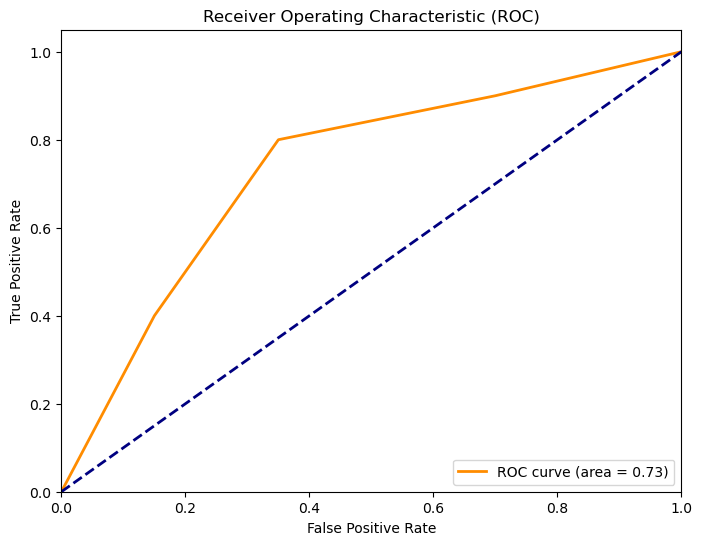

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Obtain predicted probabilities
y_pred_prob = log_reg.predict(hcl[['sex', 'overweight']])

# Step 2: Plot the ROC curve
fpr, tpr, thresholds = roc_curve(hcl['hcl'], y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [23]:
#### Assess model assumptions

Optimization terminated successfully.
         Current function value: 0.584882
         Iterations 5


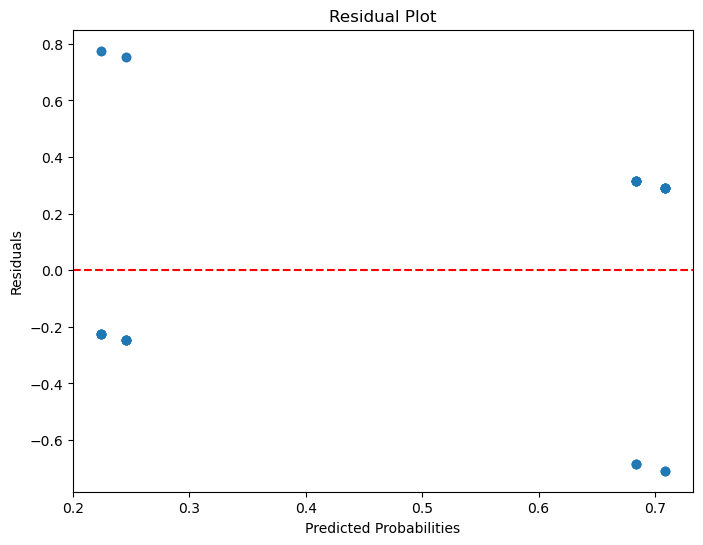

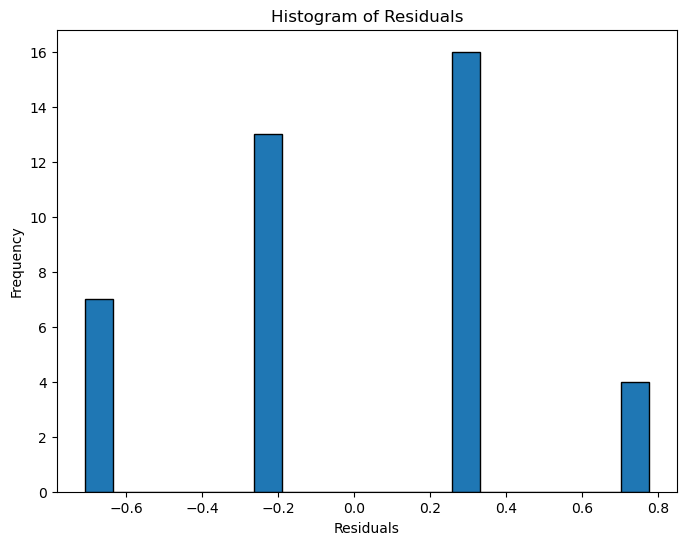

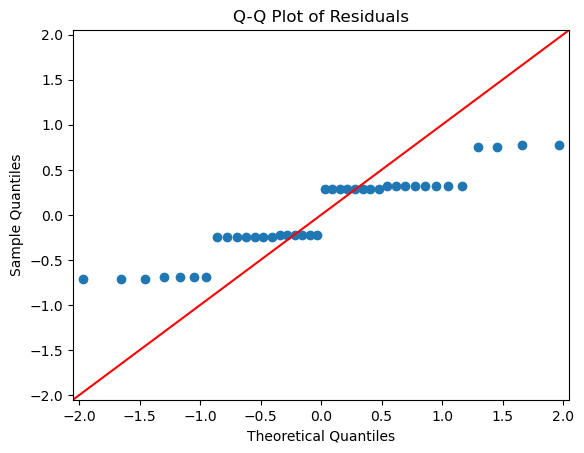

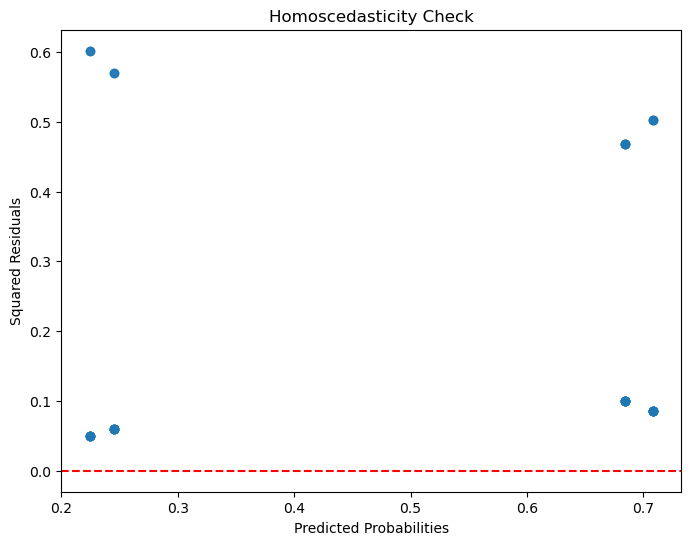

In [24]:
# Residual plot

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Assuming you've already fitted the logistic regression model
log_reg = smf.logit("hcl ~ sex + overweight", data=hcl).fit()

# Obtain predicted probabilities
predicted_probs = log_reg.predict()

# Compute residuals
residuals = log_reg.resid_response

# Diagnostic plotting
# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(predicted_probs, residuals, alpha=0.8)
plt.xlabel("Predicted Probabilities")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='k')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

# Q-Q plot
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

# Homoscedasticity check
plt.figure(figsize=(8, 6))
plt.scatter(predicted_probs, residuals**2, alpha=0.8)
plt.xlabel("Predicted Probabilities")
plt.ylabel("Squared Residuals")
plt.title("Homoscedasticity Check")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [25]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Assuming logit_results is the fitted logistic regression model
# Assuming residuals is the array of residuals from the fitted model

lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuals, log_reg.model.exog)
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)


Lagrange Multiplier p-value: 0.848514337688862
F-statistic p-value: 0.8584939728703886


In [26]:
# Check for multicollinearity

import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.formula.api as smf

# Assuming you've already fitted the logistic regression model
log_reg = smf.logit("hcl ~ sex + overweight", data=hcl).fit()

# Get the independent variables used in the model
X = hcl[['sex', 'overweight']]

# Calculate VIF
X_with_const = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(1, X_with_const.shape[1])]

# Calculate Condition Index
corr_matrix = X.corr()
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)
condition_index = np.sqrt(eigenvalues.max() / eigenvalues)

# Format VIF and Condition Index results to display at least three decimal places
vif_data["VIF"] = vif_data["VIF"].apply(lambda x: '{:.3f}'.format(x))
condition_index = ['{:.3f}'.format(x) for x in condition_index]

# Print VIF and Condition Index results
print("VIF:")
print(vif_data)
print("\nCondition Index:")
print(condition_index)


Optimization terminated successfully.
         Current function value: 0.584882
         Iterations 5
VIF:
      feature    VIF
0         sex  1.003
1  overweight  1.003

Condition Index:
['1.000', '1.052']


VIF values are both 1, and the Condition Index is also both 1. This indicates that there is no multicollinearity present in the independent variables.

Reference:
1) https://www.andrewvillazon.com/logistic-regression-python-statsmodels/#customizing-the-fit-summary
2) Linear regression: https://people.bath.ac.uk/jjf23/LMR/python/intro.html
3) https://people.bath.ac.uk/jjf23/LMR/python/predict.html